### CA2 PART A: Classification 
<b>Submitted by:</b> Koh Kai Feng, Jason <br>

In [1]:
## Import misc libraries 
#########################
from datetime import datetime
import time

start_time = time.time()
print("Last compiled : ", datetime.today())

Last compiled :  2020-02-05 20:36:15.602779


In [2]:
## Import required libraries 
#############################
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 50) # number of rows to be displayed

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Converting SKlearn dataset to Pandas format
## save load_iris() sklearn dataset to iris
## if you'd like to check dataset type use: type(load_iris())
## if you'd like to view list of attributes use: dir(load_iris())
###################################################################
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()

ds = pd.DataFrame(data= np.c_[iris['data'], iris['target']], 
                  columns= ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"] + ['Species']) 

features = ds.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

label = iris.target

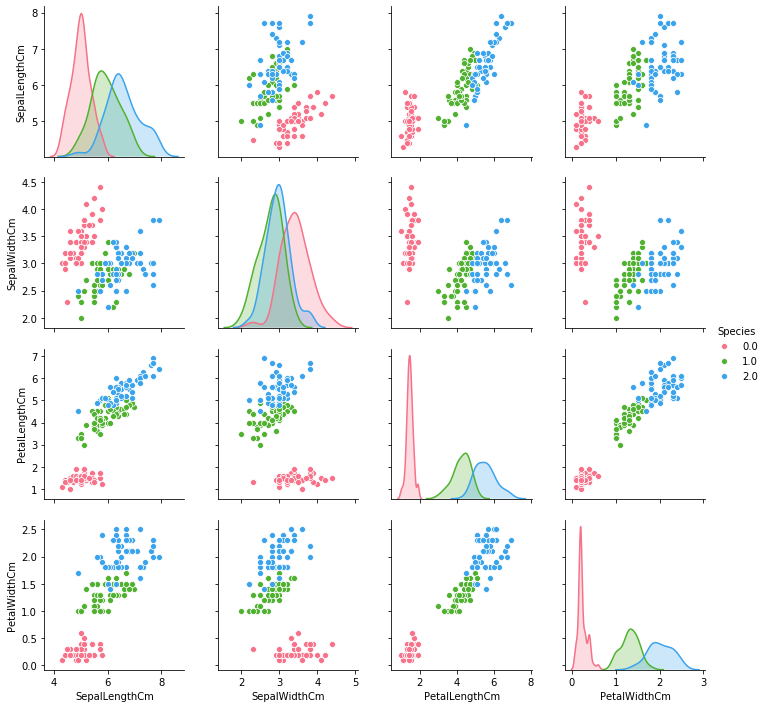

In [3]:
## Initial Visualization
## 0.0 = Iris Setosa
## 1.0 = Iris Versicolor
## 2.0 = Iris Virginica
## We see that Iris Setosa is easily separable from the other two. 
###################################################################
sns.pairplot(ds, hue="Species", palette="husl", vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

plt.show()

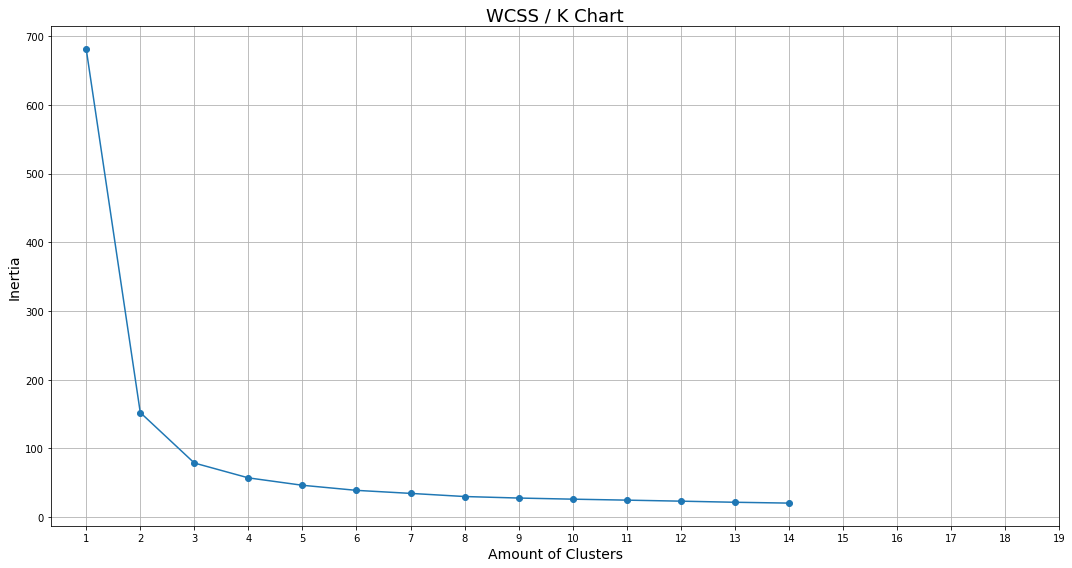

In [4]:
## 1st method. N selection for kmeans
## Note(1): Using the elbow graph to determin the number of cluster
## NOte(2): From the graph K would most probably be 2, 3 or 4
####################################################################
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(15,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

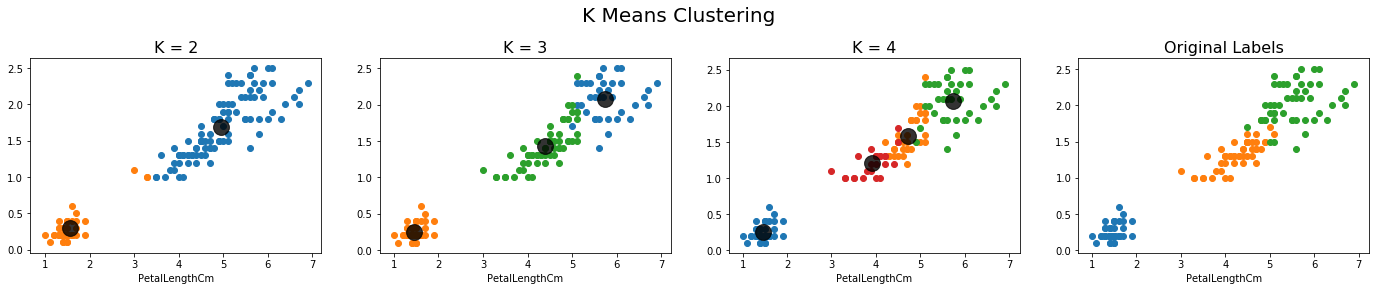

In [5]:
## Based on the elbow graph, plot out the different clusters
## Ploting of graphs (Kmeans Cluster) where K = 2, 3 or 4
## Grey circle at opacity 80% shall determin cluster center
############################################################

plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)

## Scatter plot K = 2

plt.subplot(1,4,1)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)

features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=250, alpha=0.8)

## Scatter plot K = 3

plt.subplot(1,4,2)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
l1 = kmeans.fit_predict(features)

plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=250, alpha=0.8)

## Scatter plot K = 4

plt.subplot(1,4,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)

features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=250, alpha=0.8)

## Scatter plot orginal

plt.subplot(1,4,4)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(ds.PetalLengthCm[ds.Species == 0.0],ds.PetalWidthCm[ds.Species == 0.0])
plt.scatter(ds.PetalLengthCm[ds.Species == 1.0],ds.PetalWidthCm[ds.Species == 1.0])
plt.scatter(ds.PetalLengthCm[ds.Species == 2.0],ds.PetalWidthCm[ds.Species == 2.0])

plt.subplots_adjust(top=0.8)
plt.show()

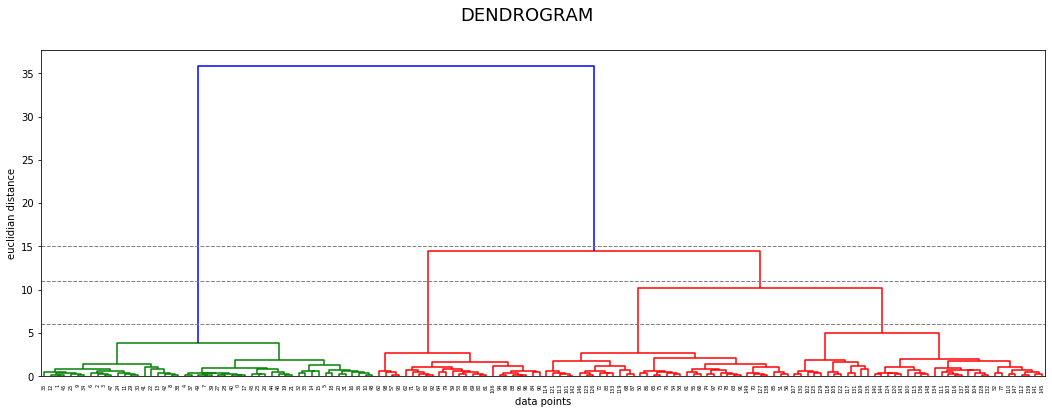

In [6]:
## 2nd method. Using Hierarchical Clustering
## Using a visual aid like the Dendrogram, we can observe a suitable number for K  
## Note(1): We can see that K = 2, 3 or 4 As line y equals to 15, 11 or 6
##################################################################################

from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(features,method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.axhline(y=15, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=11, c='grey', lw=1, linestyle='dashed')
plt.axhline(y=6, c='grey', lw=1, linestyle='dashed')

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

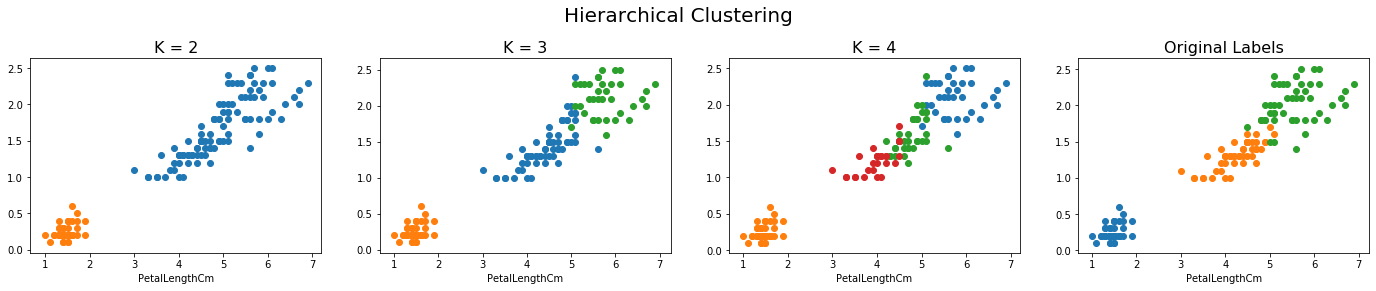

In [7]:
## Based on the Dendrogram graph, plot out the different clusters
## Ploting of graphs (AgglomerativeClustering) where K = 2, 3 or 4
###################################################################

from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering",fontsize=20)

## Scatter plot K = 2

ahc = AgglomerativeClustering(n_clusters=2)
features["labels"] = ahc.fit_predict(features)

plt.subplot(1,4,1)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

## Scatter plot K = 3

ahc = AgglomerativeClustering(n_clusters=3)
features["labels"] = ahc.fit_predict(features)
l2 = features["labels"]

plt.subplot(1,4,2)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

## Scatter plot K = 4

ahc = AgglomerativeClustering(n_clusters=4)
features["labels"] = ahc.fit_predict(features)

plt.subplot(1,4,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

## Scatter plot orginal

plt.subplot(1,4,4)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(ds.PetalLengthCm[ds.Species == 0.0],ds.PetalWidthCm[ds.Species == 0.0])
plt.scatter(ds.PetalLengthCm[ds.Species == 1.0],ds.PetalWidthCm[ds.Species == 1.0])
plt.scatter(ds.PetalLengthCm[ds.Species == 2.0],ds.PetalWidthCm[ds.Species == 2.0])

plt.subplots_adjust(top=0.8)
plt.show()

In [8]:
## 3rd method. N selection for Gussian Mixture Model
## Note(1): Using Gaussian Mixture silhouette score to determin suitable number of N
## NOte(2): From the graph N would most probably be 3 or 4 as they have the highest coefficient
################################################################################################
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 15):
    gmm = GaussianMixture(n_components=n_cluster).fit(features)
    label = gmm.predict(features)
    sil_coeff = silhouette_score(features, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6154608619504087
For n_clusters=3, The Silhouette Coefficient is 0.6820394457046044
For n_clusters=4, The Silhouette Coefficient is 0.6449163430193372
For n_clusters=5, The Silhouette Coefficient is 0.613649724622753
For n_clusters=6, The Silhouette Coefficient is 0.5544215679507851
For n_clusters=7, The Silhouette Coefficient is 0.3183692017995602
For n_clusters=8, The Silhouette Coefficient is 0.5220226782282901
For n_clusters=9, The Silhouette Coefficient is 0.3005851631119744
For n_clusters=10, The Silhouette Coefficient is 0.20625621651354759
For n_clusters=11, The Silhouette Coefficient is 0.22758719073807035
For n_clusters=12, The Silhouette Coefficient is 0.25753545352512314
For n_clusters=13, The Silhouette Coefficient is 0.22967425660830998
For n_clusters=14, The Silhouette Coefficient is 0.2668531954958275


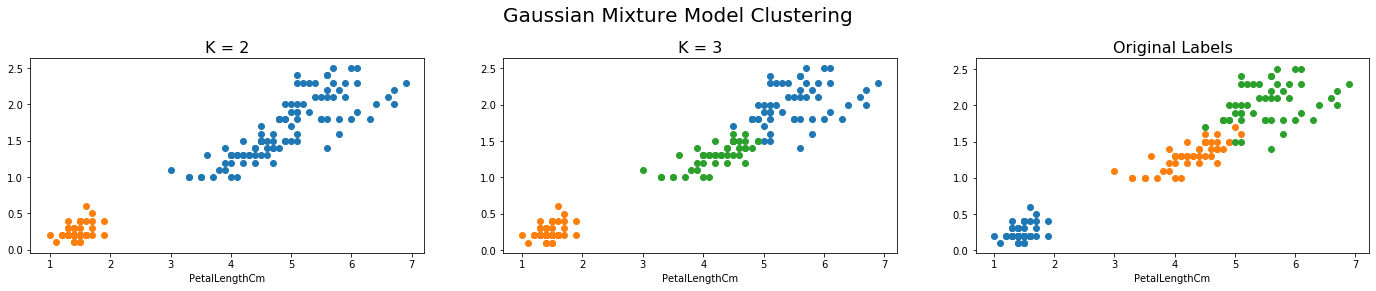

In [9]:
## Based on the Gaussian Mixture silhouette score plot out the different clusters
## Ploting of graphs (Gaussian Mixture Clustering) where N = 3 or 4
###################################################################################
plt.figure(figsize=(24,4))

plt.suptitle("Gaussian Mixture Model Clustering",fontsize=20)

gmm = GaussianMixture(n_components=2)
gmm.fit(features) 
features["labels"] = gmm.predict(features)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

gmm = GaussianMixture(n_components=3)
gmm.fit(features) 
features["labels"] = gmm.predict(features)
l3 = features["labels"]

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

plt.subplot(1,3,3)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(ds.PetalLengthCm[ds.Species == 0.0],ds.PetalWidthCm[ds.Species == 0.0])
plt.scatter(ds.PetalLengthCm[ds.Species == 1.0],ds.PetalWidthCm[ds.Species == 1.0])
plt.scatter(ds.PetalLengthCm[ds.Species == 2.0],ds.PetalWidthCm[ds.Species == 2.0])

plt.subplots_adjust(top=0.8)
plt.show()

In [18]:
## 0.0 = Iris Setosa
## 1.0 = Iris Versicolor
## 2.0 = Iris Virginica
## cross-tabulation for 3 clusters
###################################
label = iris.target

## Kmeans k = 3
################
ct1=pd.crosstab(l1, label)
print(ct1)

col_0   0   1   2
row_0            
0       0   2  36
1       0  48  14
2      50   0   0


In [15]:
## Hierarchical Clustering k = 3
#################################
ct2=pd.crosstab(l2, label)
print(ct2)

col_0    0   1   2
labels            
0        0   5  50
1       50   0   0
2        0  45   0


In [12]:
## Gaussian Mixture Clustering k = 3
#####################################
ct3=pd.crosstab(l3, label)
print(ct3)

col_0    0   1   2
labels            
0        0   5  50
1       50   0   0
2        0  45   0


In [13]:
print("--- Elapsed time  %s seconds ---" % (time.time() - start_time))

--- Elapsed time  8.492094278335571 seconds ---


### Conclusions

In order to draw a more concise conclusion, I made used of 3 models to come up with the ideal number of clusters based on the Iris dataset. The models used are as follows: 

<ol>
    <li>Kmeans + Elbow graph</li>
    <li>Hierarchical Clustering + Dendrogram</li>
    <li>Gaussian Mixture + Silhouette score</li>
</ol>
Although the dataset is complete, the classification task is defined with the presupposition that the target/label/species is unknown, working towards finding the appropriate cluster size base of the given parameters.

It is observable when trying to cluster the Iris dataset, that one species, the Iris Setosa (0.0) is much easier to differentiate as compared to the other two, the Iris Versicolor and Iris Virginica. 

Out of the 3 models used, I've found that the Gaussian Mixture Model using Silhouette score is the most consistent in predicting the number of clusters found within the Iris dataset. With Hierarchical Clustering using Dendrogram as a visual guide being the second most consistent. Lastly with Kmeans being the coin flip out of models used.